# Прогнозирование редких или аномальных минералов с использованием методов выявления аномалий и машинного обучения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM

In [2]:
data = pd.read_csv('Minerals_Database.csv')

In [37]:
data.head()

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Columns: 140 entries, Unnamed: 0 to Calculated Density
dtypes: float64(138), int64(1), object(1)
memory usage: 3.3+ MB


In [7]:
data.describe()

,Unnamed: 0,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.0,3112.0,3112.0,3112.0,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.00000
mean,1555.500000,0.677057,0.845925,0.405206,0.666800,0.701157,0.323626,0.000459,1.311375,0.000321,...,0.0,0.0,0.0,0.0,0.002892,0.903920,19.755463,607.052968,0.110810,5.28411
std,898.501345,1.388575,1.844267,0.877966,1.481692,1.456768,0.678769,0.006851,3.643521,0.017926,...,0.0,0.0,0.0,0.0,0.064578,2.654198,19.762060,673.908663,0.117827,2.86038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.007940,0.011030,0.07500
25%,777.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,8.000000,239.417117,0.044832,3.15475
50%,1555.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,15.000000,411.769265,0.078555,4.82150
75%,2333.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,25.000000,747.094885,0.134544,6.80450
max,3111.000000,6.000000,9.500000,3.000000,9.593000,4.000000,3.383000,0.213000,48.000000,1.000000,...,0.0,0.0,0.0,0.0,2.000000,43.000000,385.000000,14241.839600,1.962209,13.98600


In [8]:
data.isnull().sum()

Unnamed: 0            0
Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
                     ..
Hydrated Water        0
count                 0
Molar Mass            0
Molar Volume          0
Calculated Density    0
Length: 140, dtype: int64

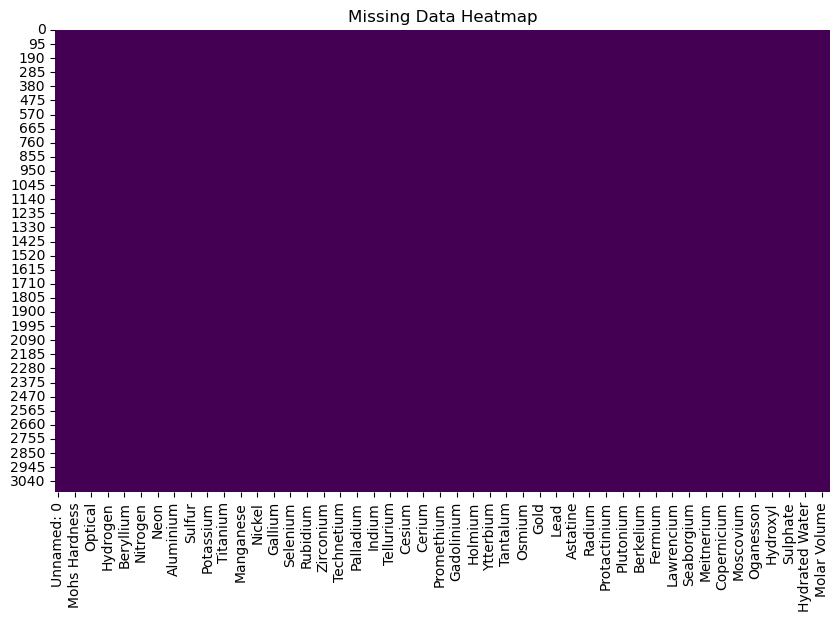

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

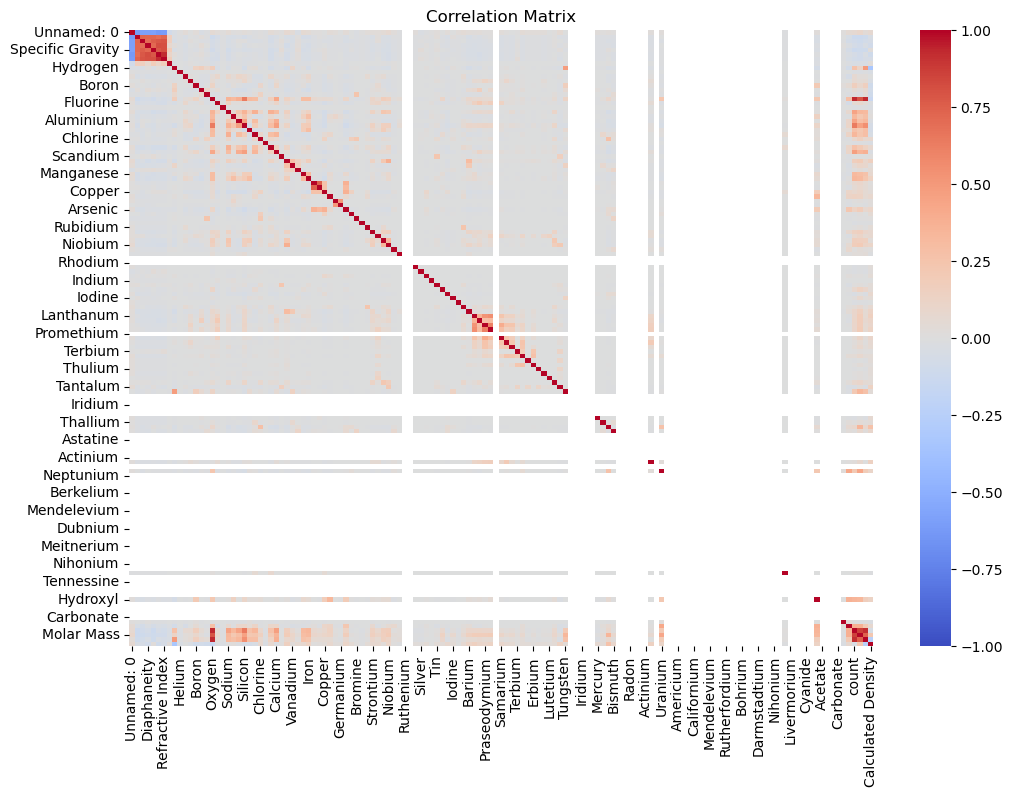

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [15]:
data.columns.tolist()

['Unnamed: 0',
 'Name',
 'Crystal Structure',
 'Mohs Hardness',
 'Diaphaneity',
 'Specific Gravity',
 'Optical',
 'Refractive Index',
 'Dispersion',
 'Hydrogen',
 'Helium',
 'Lithium',
 'Beryllium',
 'Boron',
 'Carbon',
 'Nitrogen',
 'Oxygen',
 'Fluorine',
 'Neon',
 'Sodium',
 'Magnesium',
 'Aluminium',
 'Silicon',
 'Phosphorus',
 'Sulfur',
 'Chlorine',
 'Argon',
 'Potassium',
 'Calcium',
 'Scandium',
 'Titanium',
 'Vanadium',
 'Chromium',
 'Manganese',
 'Iron',
 'Cobalt',
 'Nickel',
 'Copper',
 'Zinc',
 'Gallium',
 'Germanium',
 'Arsenic',
 'Selenium',
 'Bromine',
 'Krypton',
 'Rubidium',
 'Strontium',
 'Yttrium',
 'Zirconium',
 'Niobium',
 'Molybdenum',
 'Technetium',
 'Ruthenium',
 'Rhodium',
 'Palladium',
 'Silver',
 'Cadmium',
 'Indium',
 'Tin',
 'Antimony',
 'Tellurium',
 'Iodine',
 'Xenon',
 'Cesium',
 'Barium',
 'Lanthanum',
 'Cerium',
 'Praseodymium',
 'Neodymium',
 'Promethium',
 'Samarium',
 'Europium',
 'Gadolinium',
 'Terbium',
 'Dysprosium',
 'Holmium',
 'Erbium',
 'Thuli

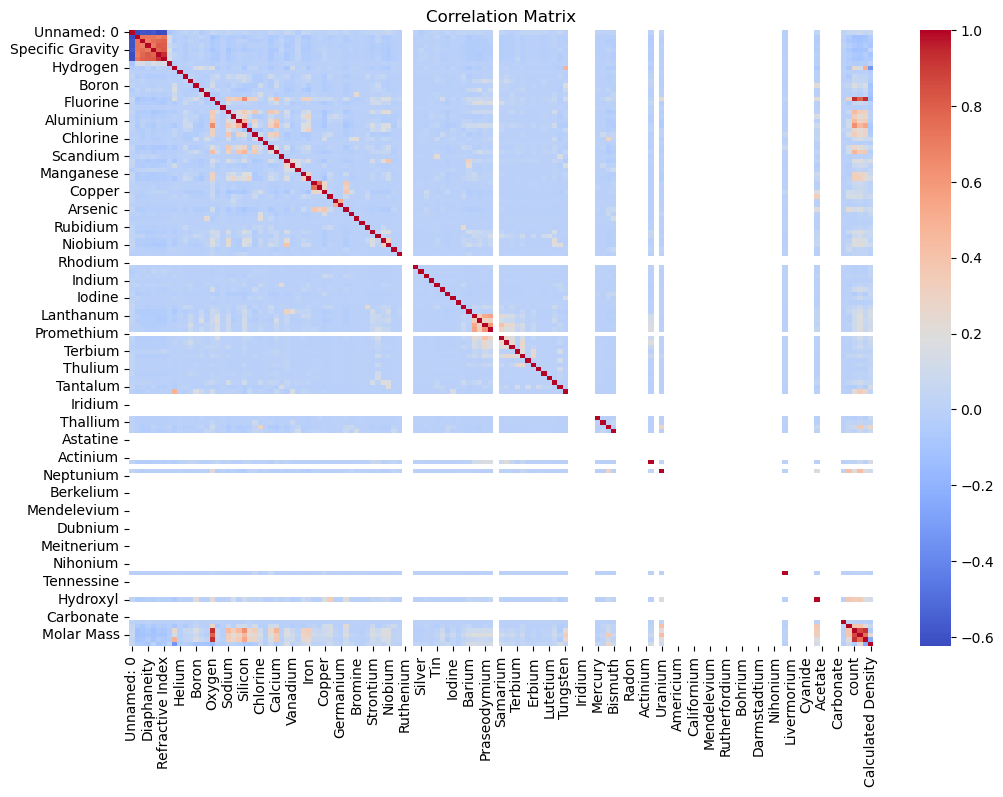

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10048\2772084166.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='coolwarm')


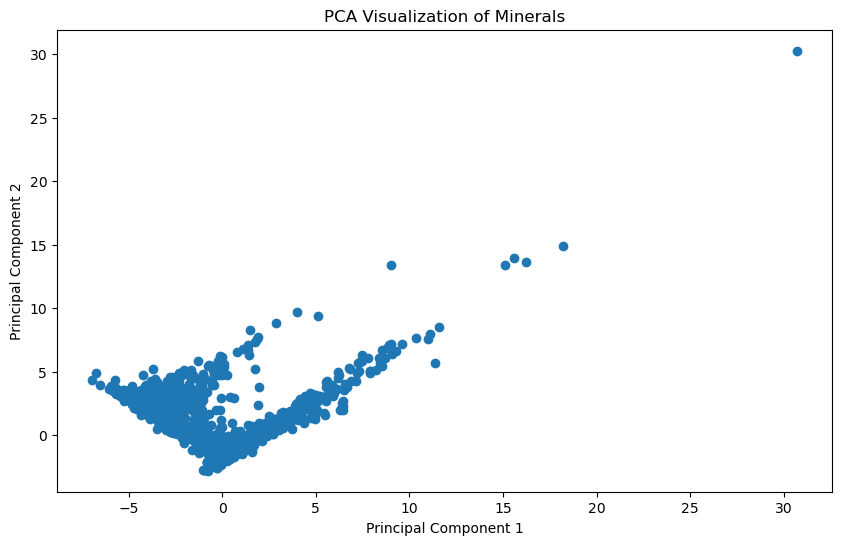

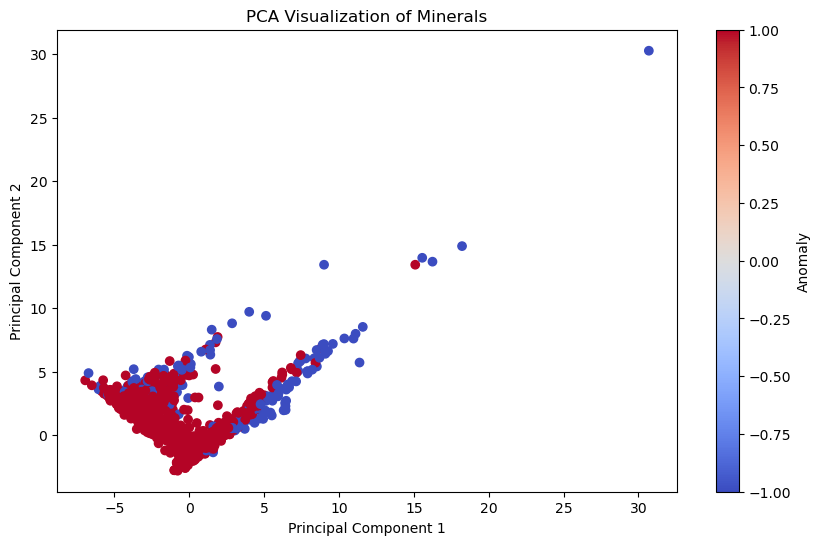

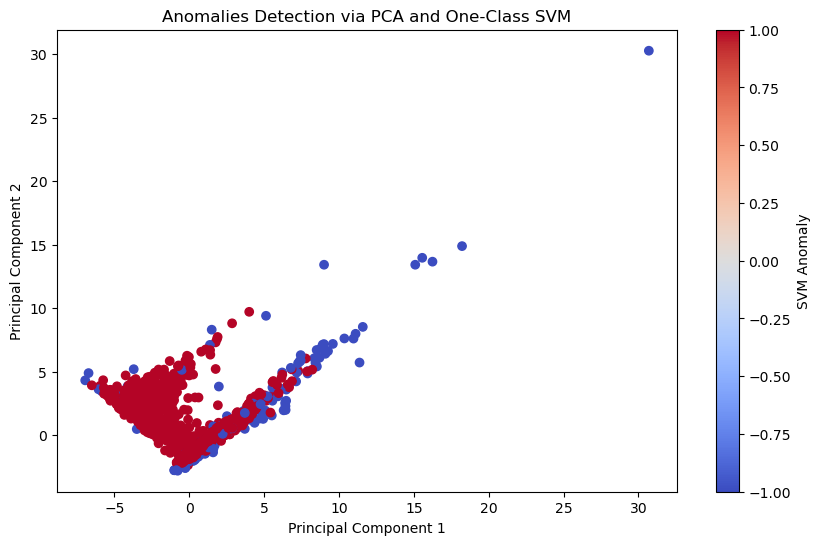

 1    2956
-1     156
Name: Anomaly, dtype: int64
 1    2963
-1     149
Name: SVM_Anomaly, dtype: int64
    Unnamed: 0             Name  Crystal Structure  Mohs Hardness  \
0            0  Abenakiite-(Ce)                5.0            4.5   
2            2         Abhurite                5.0            2.0   
13          13        Afghanite                5.0            3.5   
18          18           Ajoite                1.0            2.0   
35          35       Alluaivite                5.0            5.5   

    Diaphaneity  Specific Gravity  Optical  Refractive Index  Dispersion  \
0           0.0              3.24      3.0             1.580         0.0   
2           3.0              4.42      3.0             2.085         0.0   
13          3.0              2.60      3.0             1.526         0.0   
18          2.0              2.96      4.0             1.591         0.0   
35          3.0              0.00      3.0             1.625         0.0   

    Hydrogen  ...  Sulph

In [21]:

# Выбор колонок с химическими элементами
chemical_elements = [
    'Hydrogen', 'Helium', 'Lithium', 'Beryllium', 'Boron', 'Carbon', 'Nitrogen', 
    'Oxygen', 'Fluorine', 'Neon', 'Sodium', 'Magnesium', 'Aluminium', 'Silicon', 
    'Phosphorus', 'Sulfur', 'Chlorine', 'Argon', 'Potassium', 'Calcium', 'Scandium', 
    'Titanium', 'Vanadium', 'Chromium', 'Manganese', 'Iron', 'Cobalt', 'Nickel', 
    'Copper', 'Zinc', 'Gallium', 'Germanium', 'Arsenic', 'Selenium', 'Bromine', 
    'Krypton', 'Rubidium', 'Strontium', 'Yttrium', 'Zirconium', 'Niobium', 
    'Molybdenum', 'Technetium', 'Ruthenium', 'Rhodium', 'Palladium', 'Silver', 
    'Cadmium', 'Indium', 'Tin', 'Antimony', 'Tellurium', 'Iodine', 'Xenon', 
    'Cesium', 'Barium', 'Lanthanum', 'Cerium', 'Praseodymium', 'Neodymium', 
    'Promethium', 'Samarium', 'Europium', 'Gadolinium', 'Terbium', 'Dysprosium', 
    'Holmium', 'Erbium', 'Thulium', 'Ytterbium', 'Lutetium', 'Hafnium', 'Tantalum', 
    'Tungsten', 'Rhenium', 'Osmium', 'Iridium', 'Platinum', 'Gold', 'Mercury', 
    'Thallium', 'Lead', 'Bismuth', 'Polonium', 'Astatine', 'Radon', 'Francium', 
    'Radium', 'Actinium', 'Thorium', 'Protactinium', 'Uranium', 'Neptunium', 
    'Plutonium', 'Americium', 'Curium', 'Berkelium', 'Californium', 'Einsteinium', 
    'Fermium', 'Mendelevium', 'Nobelium', 'Lawrencium', 'Rutherfordium', 'Dubnium', 
    'Seaborgium', 'Bohrium', 'Hassium', 'Meitnerium', 'Darmstadtium', 'Roentgenium', 
    'Copernicium', 'Nihonium', 'Flerovium', 'Moscovium', 'Livermorium', 
    'Tennessine', 'Oganesson'
]

# Ионные группы
ion_groups = ['Cyanide', 'Nitrate', 'Hydroxyl', 'Acetate', 'Phosphate', 'Sulphate', 'Carbonate', 'Ammonium', 'Hydrated Water']

# Физические свойства
physical_properties = [
    'Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 
    'Optical', 'Refractive Index', 'Dispersion', 'Molar Mass', 'Molar Volume', 'Calculated Density'
]

# Объединяем все в одну таблицу
X = pd.concat([data[chemical_elements], data[ion_groups], data[physical_properties]], axis=1)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA для снижения размерности
pca = PCA(n_components=2)  # Снижаем до 2 главных компонент для визуализации
X_pca = pca.fit_transform(X_scaled)

# Визуализация данных после PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='coolwarm')
plt.title('PCA Visualization of Minerals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Модель для выявления аномалий - Isolation Forest
model = IsolationForest(contamination=0.05)  # Предполагаем, что 5% минералов аномальные
model.fit(X_scaled)
data['Anomaly'] = model.predict(X_scaled)

# Визуализация данных после PCA с использованием matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Anomaly'], cmap='coolwarm')
plt.title('PCA Visualization of Minerals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Anomaly')  # Добавляем цветовую шкалу для аномалий
plt.show()

# Модель для выявления аномалий - One-Class SVM
svm_model = OneClassSVM(gamma='auto', nu=0.05)  # nu - доля аномальных данных
svm_model.fit(X_scaled)
data['SVM_Anomaly'] = svm_model.predict(X_scaled)

# Визуализация аномалий с One-Class SVM с использованием matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['SVM_Anomaly'], cmap='coolwarm')
plt.title('Anomalies Detection via PCA and One-Class SVM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='SVM Anomaly')  # Добавляем цветовую шкалу для аномалий
plt.show()

# Анализ аномальных минералов
print(data['Anomaly'].value_counts())
print(data['SVM_Anomaly'].value_counts())

# Просмотр аномальных минералов
rare_minerals = data[data['Anomaly'] == -1]
print(rare_minerals.head())


In [23]:
# Получаем все минералы, которые были помечены как аномальные хотя бы одной из моделей (Isolation Forest или One-Class SVM)
anomalous_minerals = data[(data['Anomaly'] == -1) | (data['SVM_Anomaly'] == -1)]

# Отображаем таблицу с аномальными минералами
anomalous_minerals  # Покажем первые 5 строк аномальных минералов


,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density,Anomaly,SVM_Anomaly
0,0,Abenakiite-(Ce),5.0,4.5,0.0,3.24,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498,-1,1
2,2,Abhurite,5.0,2.0,3.0,4.42,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234,-1,-1
11,11,Aerinite,2.0,3.0,2.0,2.48,4.0,3.383,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,706.631179,0.123242,4.759,1,-1
13,13,Afghanite,5.0,3.5,3.0,2.60,3.0,1.526,0.0,0.0,...,0.0,0.0,0.0,0.0,64.0,1839.871467,0.224441,6.804,-1,-1
18,18,Ajoite,1.0,2.0,2.0,2.96,4.0,1.591,0.0,0.0,...,0.0,0.0,0.0,2.0,79.0,2011.923656,0.425978,3.920,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,3063,Yakovenchukite-(Y),0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,1165.767468,0.179504,5.390,1,-1
3081,3081,Yuksporite,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,2.0,73.0,2388.273218,0.359221,5.518,-1,1
3082,3082,Yusupovite,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,10.0,48.0,1837.289374,0.191097,7.980,-1,-1
3089,3089,Zeravshanite,0.0,0.0,0.0,0.00,0.0,0.000,0.0,2.0,...,0.0,0.0,0.0,0.0,48.0,1481.413844,0.302760,4.061,1,-1


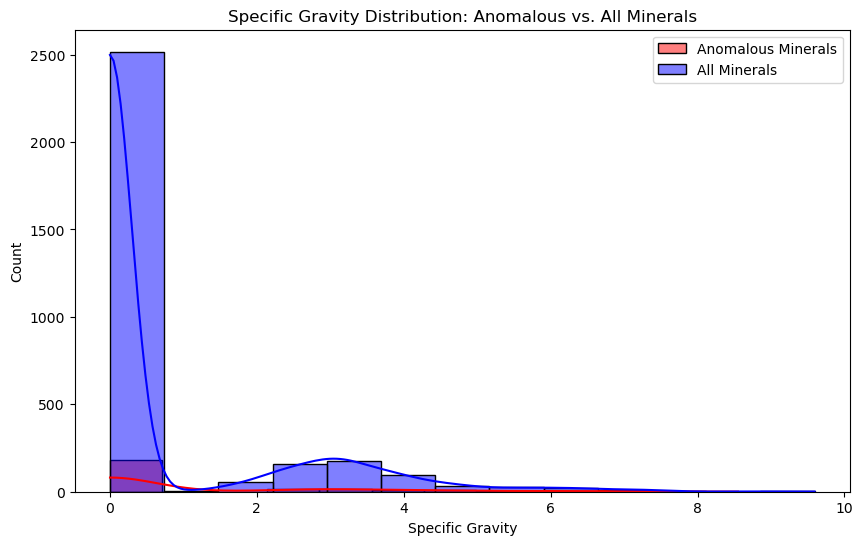

In [24]:
# Построим гистограммы для одного из ключевых признаков
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=anomalous_minerals, x='Specific Gravity', color='red', label='Anomalous Minerals', kde=True)
sns.histplot(data=data, x='Specific Gravity', color='blue', label='All Minerals', kde=True)
plt.title('Specific Gravity Distribution: Anomalous vs. All Minerals')
plt.legend()
plt.show()


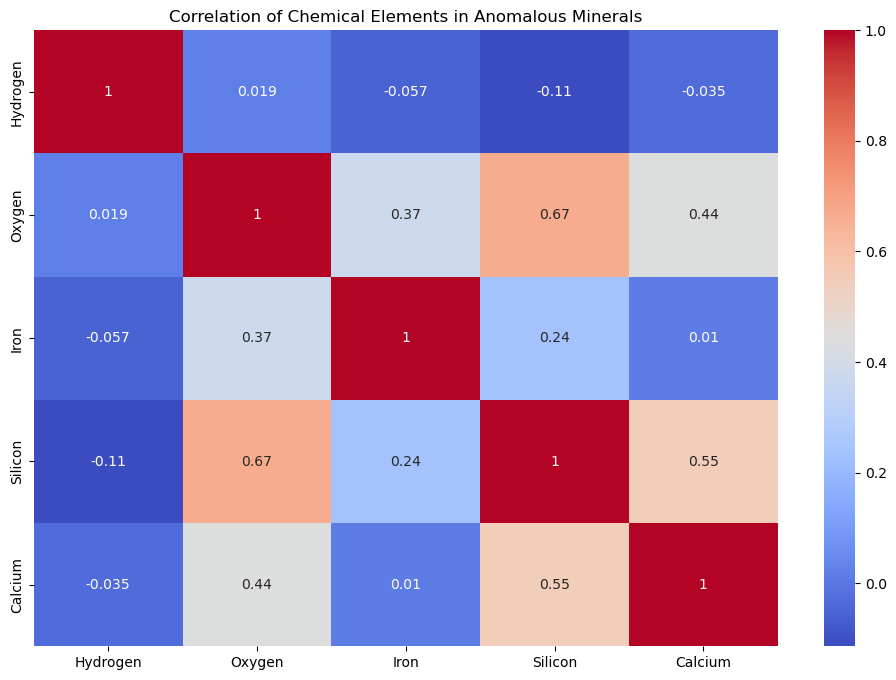

In [25]:
# Выбор химических элементов
chemical_elements = ['Hydrogen', 'Oxygen', 'Iron', 'Silicon', 'Calcium']  # Выберите больше элементов для анализа

# Построим тепловую карту для химических элементов
plt.figure(figsize=(12, 8))
sns.heatmap(anomalous_minerals[chemical_elements].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Chemical Elements in Anomalous Minerals')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10048\3166683952.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_minerals['Cluster'] = clusters


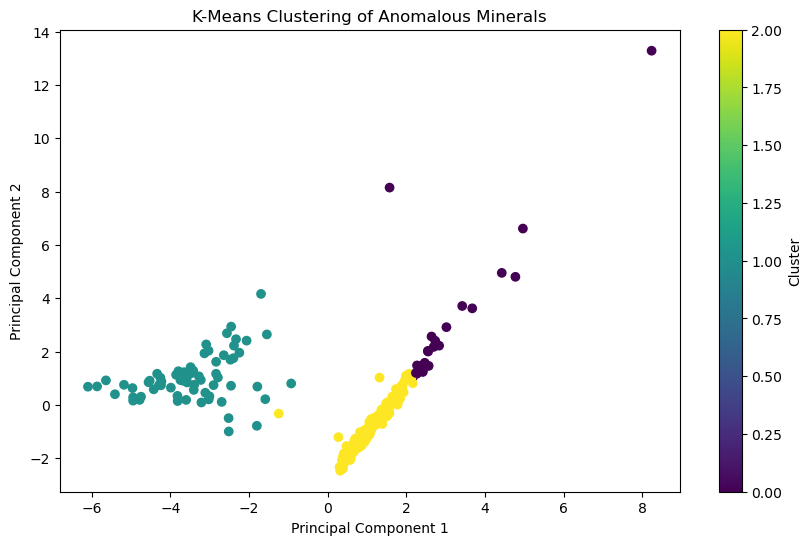

In [31]:
from sklearn.cluster import KMeans

# Выбор физических свойств и химических элементов для аномальных минералов
X_anomalous = anomalous_minerals[physical_properties + chemical_elements]

# Масштабируем данные аномальных минералов
scaler = StandardScaler()
X_anomalous_scaled = scaler.fit_transform(X_anomalous)

# Применяем PCA для аномальных минералов
pca_anomalous = PCA(n_components=2)
X_pca_anomalous = pca_anomalous.fit_transform(X_anomalous_scaled)

# Применяем KMeans для кластеризации аномальных минералов
kmeans = KMeans(n_clusters=3, random_state=42)  # Определяем количество кластеров
clusters = kmeans.fit_predict(X_anomalous_scaled)

# Добавляем кластеры в данные
anomalous_minerals['Cluster'] = clusters

# Визуализация кластеров для аномальных минералов
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_anomalous[:, 0], X_pca_anomalous[:, 1], c=anomalous_minerals['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Anomalous Minerals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


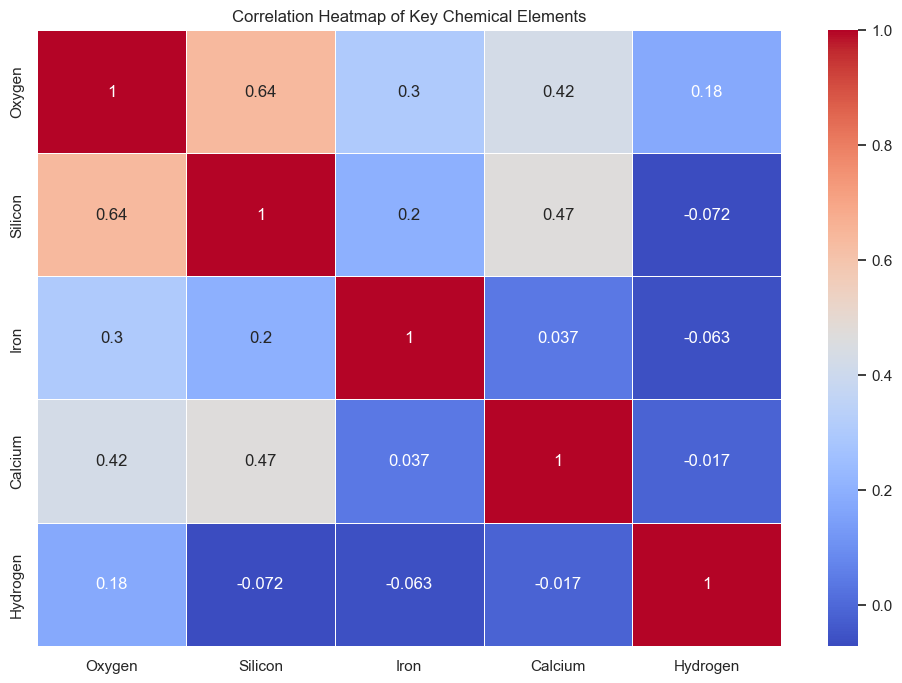

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant chemical elements
chemical_elements = ['Oxygen', 'Silicon', 'Iron', 'Calcium', 'Hydrogen']

# Compute correlation matrix
corr_matrix = data[chemical_elements].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Chemical Elements')
plt.show()

## 1. Tree Structure Diagram for Isolation Forest
This illustration will show how Isolation Forest isolates data points. For simplicity, we’ll generate 2D synthetic data and highlight how fewer splits isolate anomalous points.

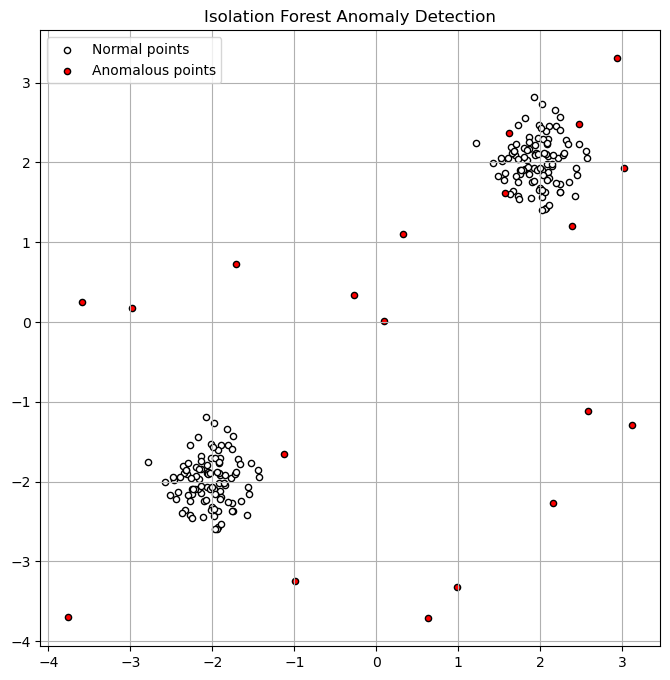

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create synthetic 2D data
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Fit Isolation Forest
clf = IsolationForest(contamination=0.1)
clf.fit(np.r_[X, X_outliers])
scores_pred = clf.decision_function(np.r_[X, X_outliers])
y_pred = clf.predict(np.r_[X, X_outliers])

# Visualization of the tree structure (splitting)
plt.figure(figsize=(8, 8))
plt.title("Isolation Forest Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k', label="Normal points")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="Anomalous points")
plt.legend()
plt.grid(True)
plt.show()


## 2. Decision Boundary Plot for One-Class SVM
This visualization will show how One-Class SVM separates normal points from anomalies using a hyperplane. It maps data to a higher-dimensional space and creates a boundary that separates normal data from outliers.

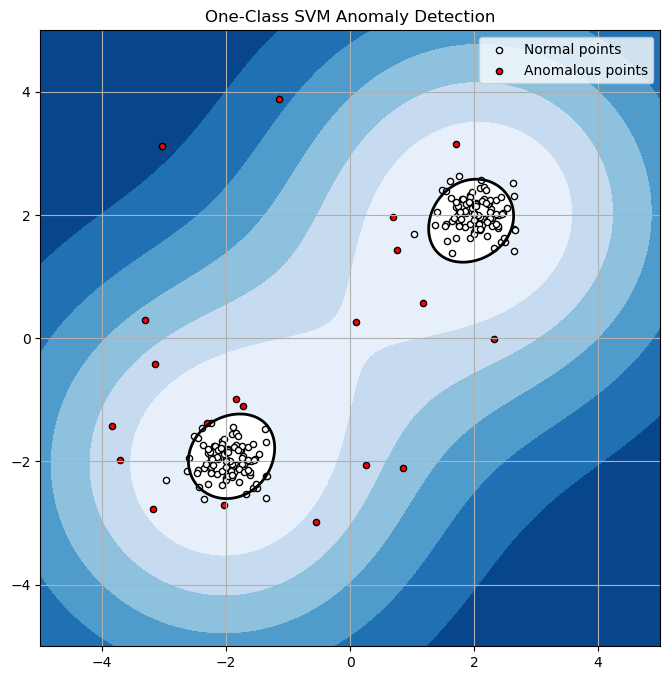

In [5]:
from sklearn.svm import OneClassSVM

# Generate synthetic data
X_train = 0.3 * rng.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]
X_test = 0.3 * rng.randn(20, 2)
X_test = np.r_[X_test + 2, X_test - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Fit the One-Class SVM model
clf = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.title("One-Class SVM Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="Normal points")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="Anomalous points")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_1380\3230748209.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


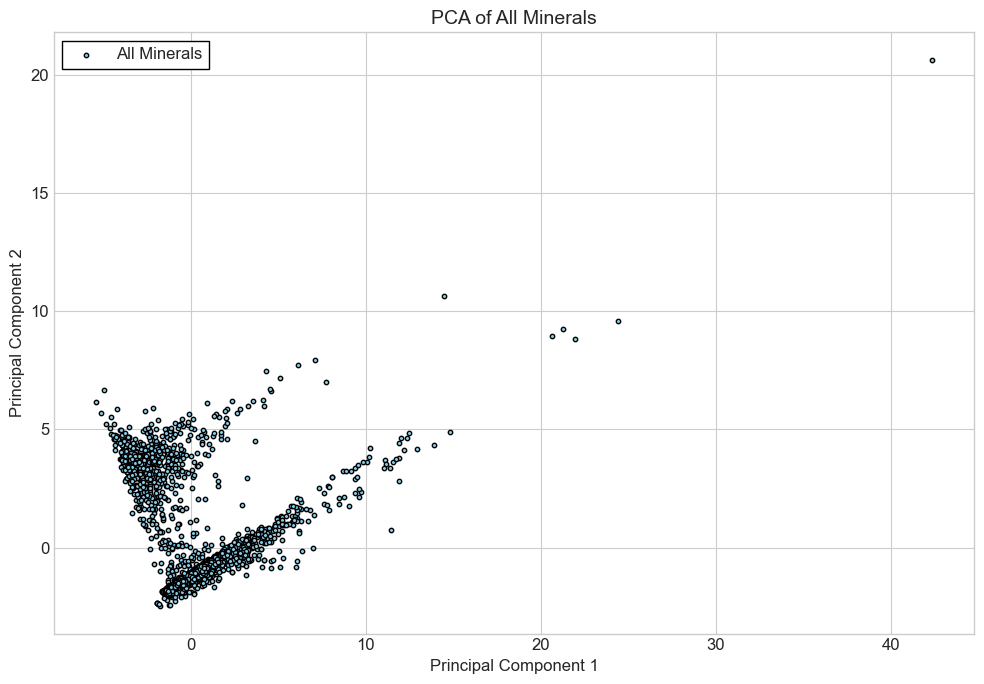

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('Minerals_Database.csv')

# Select relevant columns for PCA, excluding ID/name columns
features = data.columns[2:]  # Adjust if necessary to include only relevant features

# Standardize the data for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Add PCA results to the DataFrame
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Set up figure with preferred fonts and style for clear, high-quality visuals
plt.figure(figsize=(10, 7))
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

# Plot for all minerals in PCA space
plt.scatter(data['PCA1'], data['PCA2'], s=10, c='skyblue', edgecolor='k', label="All Minerals")
plt.title("PCA of All Minerals")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding legend with frame to make it clear
plt.legend(frameon=True, loc='upper left', fontsize=12, framealpha=1, edgecolor="black", fancybox=False)

# Display the plot
plt.tight_layout()
plt.show()


# 1. Обнаружение аномалий с помощью Isolation Forest и One-Class SVM

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Установка параметров для Isolation Forest и One-Class SVM
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level if needed
one_class_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma="auto")  # Adjust nu and gamma based on your data

# Обучение и предсказание для Isolation Forest
data['Anomaly_IF'] = isolation_forest.fit_predict(data[features])
data['Anomaly_IF'] = data['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)  # Convert to 1 for anomalies, 0 for normal

# Обучение и предсказание для One-Class SVM
data['Anomaly_SVM'] = one_class_svm.fit_predict(data[features])
data['Anomaly_SVM'] = data['Anomaly_SVM'].apply(lambda x: 1 if x == -1 else 0)  # Convert to 1 for anomalies, 0 for normal

# Подсчет количества аномалий для каждого алгоритма
num_anomalies_if = data['Anomaly_IF'].sum()
num_anomalies_svm = data['Anomaly_SVM'].sum()

print(f"Isolation Forest detected {num_anomalies_if} anomalies.")
print(f"One-Class SVM detected {num_anomalies_svm} anomalies.")


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest detected 156 anomalies.
One-Class SVM detected 663 anomalies.


# 2. Примеры аномальных минералов и их свойства

In [40]:
# Выбираем примеры аномальных минералов, определенных обоими алгоритмами
anomalies = data[(data['Anomaly_IF'] == 1) | (data['Anomaly_SVM'] == 1)]
sample_anomalies = anomalies.sample(5)  # Choose 5 random anomalies as examples

# Отображение примеров аномалий
print(sample_anomalies[['Name', 'Crystal Structure', 'Mohs Hardness', 'Specific Gravity', 'Optical']])


                          Name  Crystal Structure  Mohs Hardness  \
1751  Hydroxyl-bastnasite-(Ce)                0.0           0.00   
722                 Torbernite                4.0           2.25   
2984              Vigrishinite                0.0           0.00   
384                   Jonesite                2.0           3.50   
628                Satterlyite                5.0           4.75   

      Specific Gravity  Optical  
1751             0.000      0.0  
722              3.200      3.0  
2984             0.000      0.0  
384              3.105      4.0  
628              3.680      3.0  


# 3. Визуализация аномалий в PCA-пространстве

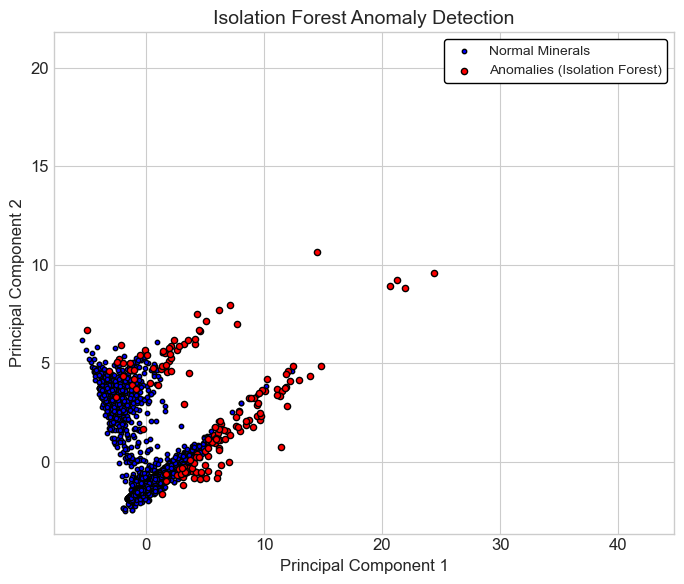

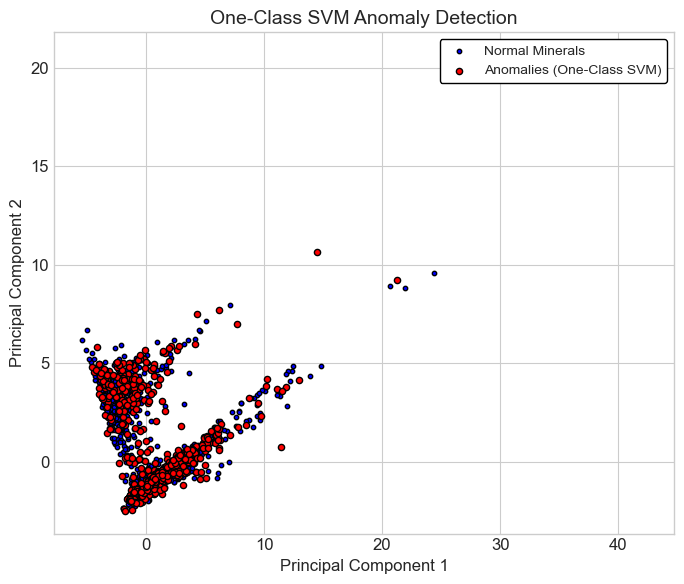

In [43]:
import matplotlib.pyplot as plt

# Первый график: Normal Minerals и Anomalies (Isolation Forest)
plt.figure(figsize=(7, 6))
plt.scatter(data.loc[data['Anomaly_IF'] == 0, 'PCA1'], 
            data.loc[data['Anomaly_IF'] == 0, 'PCA2'], 
            s=10, c='blue', edgecolor='k', label="Normal Minerals")
plt.scatter(data.loc[data['Anomaly_IF'] == 1, 'PCA1'], 
            data.loc[data['Anomaly_IF'] == 1, 'PCA2'], 
            s=20, c='red', edgecolor='k', label="Anomalies (Isolation Forest)")
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(frameon=True, loc='upper right', fontsize=10, framealpha=1, edgecolor="black")
plt.tight_layout()
plt.show()

# Второй график: Normal Minerals и Anomalies (One-Class SVM)
plt.figure(figsize=(7, 6))
plt.scatter(data.loc[data['Anomaly_SVM'] == 0, 'PCA1'], 
            data.loc[data['Anomaly_SVM'] == 0, 'PCA2'], 
            s=10, c='blue', edgecolor='k', label="Normal Minerals")
plt.scatter(data.loc[data['Anomaly_SVM'] == 1, 'PCA1'], 
            data.loc[data['Anomaly_SVM'] == 1, 'PCA2'], 
            s=20, c='red', edgecolor='k', label="Anomalies (One-Class SVM)")
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(frameon=True, loc='upper right', fontsize=10, framealpha=1, edgecolor="black")
plt.tight_layout()
plt.show()


# Elbow method

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


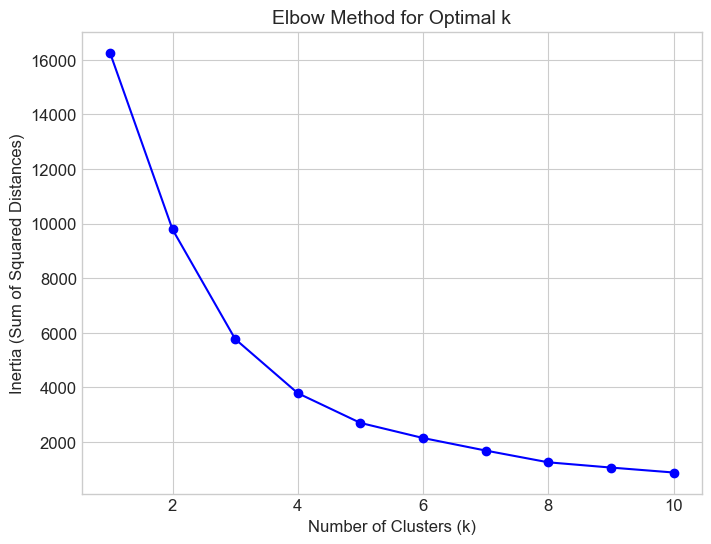

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Данные только для аномальных минералов
anomalous_minerals = data[(data['Anomaly_IF'] == 1) | (data['Anomaly_SVM'] == 1)]

# Диапазон количества кластеров для оценки
k_range = range(1, 11)
inertia_values = []

# Вычисление KMeans для каждого количества кластеров и сохранение значения инерции
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(anomalous_minerals[['PCA1', 'PCA2']])
    inertia_values.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


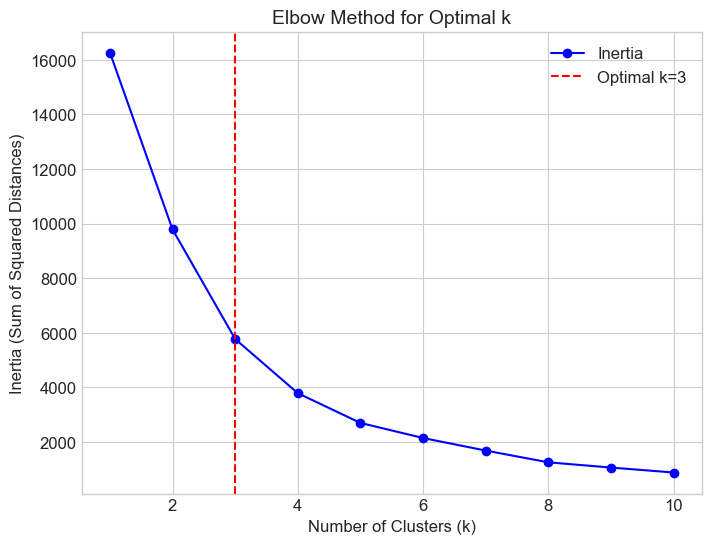

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data only for anomalous minerals
anomalous_minerals = data[(data['Anomaly_IF'] == 1) | (data['Anomaly_SVM'] == 1)]

# Range of clusters for evaluation
k_range = range(1, 11)
inertia_values = []

# Compute KMeans for each number of clusters and store inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(anomalous_minerals[['PCA1', 'PCA2']])
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method with dashed line and annotation
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b', label="Inertia")
plt.axvline(x=3, color='r', linestyle='--', label="Optimal k=3")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_1208\4069453121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_minerals['Cluster'] = clusters


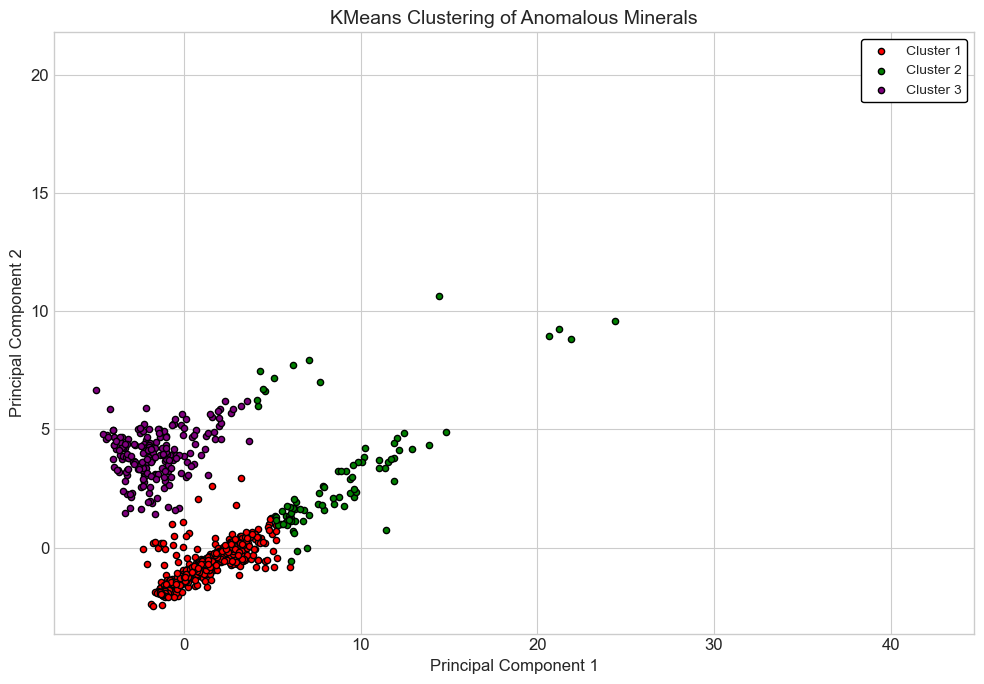

In [44]:
from sklearn.cluster import KMeans

# Выбор только аномальных минералов, выявленных Isolation Forest или One-Class SVM
anomalous_minerals = data[(data['Anomaly_IF'] == 1) | (data['Anomaly_SVM'] == 1)]

# Применение KMeans для кластеризации аномальных минералов
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(anomalous_minerals[['PCA1', 'PCA2']])  # Кластеризация в PCA-пространстве

# Добавление результатов кластеризации в DataFrame
anomalous_minerals['Cluster'] = clusters

# Визуализация кластеров
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'purple']
for cluster in range(3):
    plt.scatter(anomalous_minerals.loc[anomalous_minerals['Cluster'] == cluster, 'PCA1'], 
                anomalous_minerals.loc[anomalous_minerals['Cluster'] == cluster, 'PCA2'], 
                s=20, c=colors[cluster], label=f'Cluster {cluster+1}', edgecolor='k')

# Настройки графика
plt.title("KMeans Clustering of Anomalous Minerals")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(frameon=True, loc='upper right', fontsize=10, framealpha=1, edgecolor="black")
plt.tight_layout()
plt.show()

# A list of minerals for each cluster after running KMeans clustering on the combined set of anomalies:

In [46]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming 'anomalous_minerals' is your DataFrame containing only the detected anomalies
# and 'PCA1' and 'PCA2' are the principal components after PCA.

# Run KMeans clustering with 3 clusters on the anomalies
kmeans = KMeans(n_clusters=3, random_state=42)
anomalous_minerals['Cluster'] = kmeans.fit_predict(anomalous_minerals[['PCA1', 'PCA2']])

# Generate the list of minerals in each cluster
for cluster in range(3):
    cluster_minerals = anomalous_minerals[anomalous_minerals['Cluster'] == cluster]['Name'].tolist()
    print(f"Cluster {cluster + 1}:")
    print(cluster_minerals)
    print("\n")


Cluster 1:
['Agrinierite', 'Aubertite', 'Bismite', 'Bukovskyite', 'Carobbiite', 'Chamosite', 'Ferronigerite-2N1S', 'Guilleminite', 'Gwihabaite', 'Hollandite', 'Holmquistite', 'Hydrohalite', 'Kaatialaite', 'Lanarkite', 'Lansfordite', 'Margarite', 'Natron', 'Nenadkevichite', 'Nickel', 'Nosean', 'Otavite', 'Parisite-(Ce)', 'Parsonsite', 'Phosphuranylite', 'Posnjakite', 'Romanechite', 'Saneroite', 'Santite', 'Sborgite', 'Schrockingerite', 'Schwertmannite', 'Seeligerite', 'Seifertite', 'Sincosite', 'Sinkankasite', 'Stercorite', 'Thomsenolite', 'Tyrolite', 'Whewellite', 'Adamantane', 'Adamantane-methane-hydrate', 'Albite-Ge', 'Alfredstelznerite', 'Allanite-(La)', 'Alloriite', 'Almeidaite', 'Alpersite', 'Aluminotaramite', 'Ammonioborite', 'Anatacamite', 'Angarfite', 'Ankinovichite', 'Anorthominasragrite', 'Arakiite', 'Argesite', 'Aristarainite', 'Armangite', 'Arrojadite-(KFe)', 'Ashcroftine-(Y)', 'Atencioite', 'Averievite', 'Bafertisite', 'Bairdite', 'Bakhchisaraitsevite', 'Baliczunicite', 'B

C:\Users\user\AppData\Local\Temp\ipykernel_1208\3662128076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_minerals['Cluster'] = kmeans.fit_predict(anomalous_minerals[['PCA1', 'PCA2']])
